<a href="https://colab.research.google.com/github/yyaallpp-naver-com/1-/blob/main/03_03_%ED%8A%B9%EC%84%B1_%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 다중 회귀

:여러 개의 특성을 사용한 선형 회귀<br>
특성이 2개면 타깃 값과 함께 3차원 공간을 형성 -> 선형 회귀 방정식은 **평면**이 된다.<br>
'타깃 = a * 특성1 + b * 특성2 + 절편'



**특성 공학(feature engineering)**
: 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

##데이터 준비

In [1]:
#판다스를 사용
import pandas as pd #pd는 관례적으로 사용하는 판다스의 별칭입니다
df = pd.read_csv('https://bit.ly/perch_csv') #파일을 판다스에서 읽고 데이터 프레임 만들기
perch_full = df.to_numpy() #넘파이 배열로 변환
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
#타깃 데이터 준비
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
# 훈련세트와 테스트세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

##사이킷런의 변환기

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공.
이러한 클래스를 **변환기(transformer)**라고 부름

변환기 클래스는 fit(), transform()메서드 사용

In [4]:
#polynomialFeatures 클래스를 사용
from sklearn.preprocessing import PolynomialFeatures

In [5]:
#클래스의 객체를 만든다음 fit(), transform() 메서드 차례로 호출
poly = PolynomialFeatures()
poly.fit([[2, 3]]) #새롭게 만들 특성 조합을 찾음
print(poly.transform([[2, 3]])) #실제로 데이터를 변환

[[1. 2. 3. 4. 6. 9.]]


무게 =  a * 길이 + b * 높이 + c * 두께 + d * 1

특성은 (길이, 높이, 두께, 1)

In [6]:
#절편을 위한 항 제거해서 만들기
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [7]:
#이 방식을 train_input에 적용
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input) #변환한 데이터를 train_poly에 저장
print(train_poly.shape) #배열의 크기 확인

(42, 9)


In [8]:
poly.get_feature_names_out() #9개의 특성이 어떻게 만들어 졌는지 확인

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [9]:
#테스트 세트도 변환
test_poly = poly.transform(test_input)

##다중 회귀 모델 훈련하기

In [10]:
#train_poly 사용해 모델을 훈련
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target)) #훈련 세트 점수 확인

0.9903183436982125


In [11]:
#테스트 세트 점수 확인
print(lr.score(test_poly, test_target))

0.9714559911594111


In [36]:
#5제곱까지 특성을 만들어 출력
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape) #열의 개수가 특성의 개수

(42, 55)


In [37]:
poly.get_feature_names_out() #만들어진 특성 확인

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [13]:
#만들어진 특성을 사용해서 훈련 후 점수 확인
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [14]:
#테스트 세트 점수 확인
print(lr.score(test_poly, test_target))

-144.40579436844948


##규제
머신 러닝 모델이 훈련 세트를 과도하게 학습하지 못하도록 훼방 하는 것<br>
즉, 모델이 훈련세트에 과대 적합되지 않도록 만드는 것 : 계수(기울기)를 작게 만들기

In [15]:
#특성의 스케일이 정규화 되지 않으면 계수값도 차이가 나게되므로, Standard Scaler 사용하여 정규화 진행
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() #객체 초기화
ss.fit(train_poly) #훈련
train_scaled = ss.transform(train_poly) #훈련세트 변환
test_scaled = ss.transform(test_poly) #테스트세트 변환

##릿지 회귀
계수를 제곱한 값을 기준으로 규제를 적용


In [16]:
#릿지 모델 훈련
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target) 
print(ridge.score(train_scaled, train_target)) #점수 조금 낮아짐

0.9896101671037343


In [17]:
print(ridge.score(test_scaled, test_target)) #점수 돌아옴

0.9790693977615387


###규제의 강도를 조절하기 위해 alpha 매개변수 사용
alpha값이 작으면 계수를 줄이는 역할이 줄어들고 선형회귀 모델과 유사해지므로 과대적합 가능성이 커짐

적절한 alpha값을 찾기 위해서 alpha값에 대한 R^2의 그래프 그려보기

In [18]:
#alpha값 바꿀때마다 score()메서드의 결과를 저장할 리스트 만들기
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [19]:
#알파값을 늘려가며 릿지 회귀 모델을 훈련한 후 각 세트의 점수를 파이썬 리스트에 저장
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  #릿지 모델을 만듭니다
  ridge = Ridge(alpha=alpha)
  #릿지 모델을 훈련합니다
  ridge.fit(train_scaled, train_target)
  #훈련 점수와 테스트 점수를 저장합니다
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

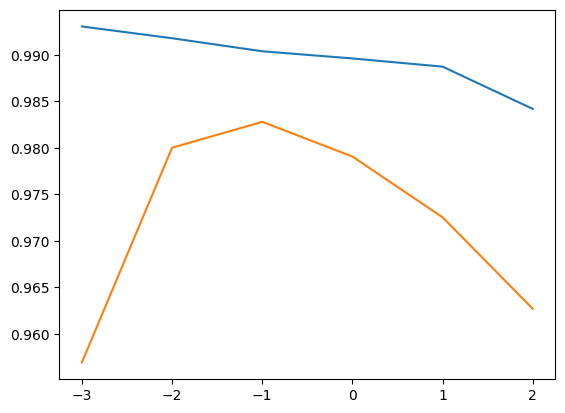

In [20]:
#그래프 간격 맞추기 위해 로그함수로 바꾸어 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [21]:
#찾은 최적의 alpha값으로 훈련
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


##라쏘 회귀
계수의 절댓값을 기준으로 규제를 적용 -> 계수를 0으로 만들어버릴 수 있음

In [22]:
from sklearn.linear_model import Lasso
lasso = Lasso() #라쏘 모델 만들기
lasso.fit(train_scaled, train_target) #라쏘 모델 훈련
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [23]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [24]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  #라쏘 모델을 만듭니다
  lasso = Lasso(alpha=alpha, max_iter=10000) #최적의 계수를 찾기위해 반복적인 계산을 수행
  #라쏘 모델을 훈련합니다
  lasso.fit(train_scaled, train_target)
  #훈련 점수와 테스트 점수를 저장합니다
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


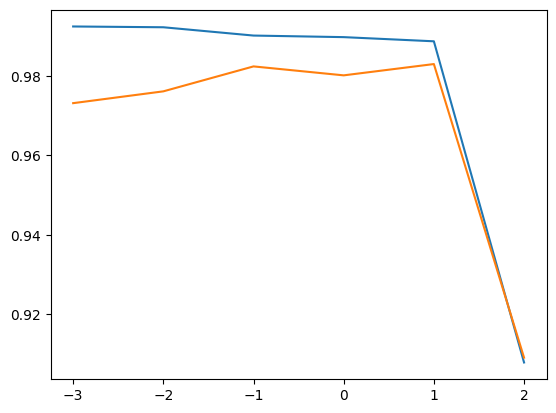

In [25]:
#그래프 그려보기(x축 로그스케일 사용)
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [26]:
#최적의 알파값 10 으로 다시 훈련 
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [27]:
#라쏘 모델의 계수 중 0인것을 세어보기
print(np.sum(lasso.coef_ == 0))

40


In [45]:
print(lasso.coef_)

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]


In [44]:
notZero = lasso.coef_[lasso.coef_!= 0]
print(notZero)

[12.14852453 55.44856399 42.23100799 13.70596191 43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365 13.53038193 21.22111356 18.66993032
 15.81041778 18.14672268 15.51272953]


55개 특성을 모델에 주입했지만, 라쏘 모델이 사용한 특성은 55-40 =15개

라쏘모델은 유용한 특성을 골라내는 용도로 사용 가능